<a href="https://colab.research.google.com/github/basel5621/depi-project/blob/main/Exploration_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
COLUMNS_NAMES = ["label", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('/content/drive/MyDrive/dataset/Sentiment 1.6 million tweets.csv',encoding="ISO-8859-1" ,names = COLUMNS_NAMES)

In [ ]:
df.head()

,label,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.isna().sum()

,0
label,0
ids,0
date,0
flag,0
user,0
text,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1600000, 6)

## see the unique value of data and thier number

In [ ]:
for col in df.columns:
  print(col,':',df[col].nunique(),'unique value')
  print('top five:')
  print(df[col].value_counts().nlargest(5))
  print('\n' + '*' * 20 + '\n')

label : 2 unique value
top five:
label
0    800000
4    800000
Name: count, dtype: int64

********************

ids : 1598315 unique value
top five:
ids
2190457769    2
1972193428    2
1989776729    2
1989776908    2
1564543229    2
Name: count, dtype: int64

********************

date : 774363 unique value
top five:
date
Mon Jun 15 12:53:14 PDT 2009    20
Fri May 29 13:40:04 PDT 2009    17
Fri May 22 05:10:17 PDT 2009    17
Mon Jun 15 13:39:50 PDT 2009    17
Fri Jun 05 14:13:07 PDT 2009    16
Name: count, dtype: int64

********************

flag : 1 unique value
top five:
flag
NO_QUERY    1600000
Name: count, dtype: int64

********************

user : 659775 unique value
top five:
user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
Name: count, dtype: int64

********************

text : 1581466 unique value
top five:
text
isPlayer Has Died! Sorry     210
good morning                 118
headache                     11

## drop unused features

In [ ]:
df.drop(['ids','flag','user'],axis=1,inplace=True)

In [ ]:
df['label'] = df['label'].replace({4:1})  # 0:'negative', 1:'positive'

In [ ]:
df.sample(5)

,label,date,text
1173177,1,Sun May 31 07:31:42 PDT 2009,@shanbot Heh. Being plasterd helps enormously ...
1365175,1,Fri Jun 05 17:43:30 PDT 2009,getting out of waverly for the weekend. Im lik...
1213135,1,Mon Jun 01 01:06:23 PDT 2009,Good morning... I can feel the sun shining alr...
499601,0,Mon Jun 15 19:02:57 PDT 2009,DONALD TRUMP.........DONALD TRUMP SO MUCH FO...
1037785,1,Thu May 28 22:09:58 PDT 2009,Smokin a bleezy! Pickin out my new TV!!!


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')

In [ ]:
df.head()

,label,date,text
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...
2,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...
3,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df['date'].dt.year.value_counts()

,count
date,
2009,1600000


In [ ]:
df['date'].dt.month.value_counts()

,count
date,
6,923608
5,576367
4,100025


now we notice that data is collected in 2009 for three month (4,5,6)

# Preprocessing

In [ ]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#', '', tweet)        # Remove hashtags
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()                  # Convert to lowercase
    return tweet

df['cleaned_text'] = df['text'].apply(clean_tweet)

In [ ]:
df.head()

,label,date,text,cleaned_text
0,0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [ ]:
sample=df.sample(1)
print(sample['text'])
print('\n' + '*' * 20 + '\n')
print(sample['cleaned_text'])

305119    My OQO 02 died last week ... replaced it with ...
Name: text, dtype: object

********************

305119    my oqo 02 died last week  replaced it with an ...
Name: cleaned_text, dtype: object


In [ ]:
stop_words=stopwords.words('english')
stop_words.remove('not')
def pre_processing(text):
  token= word_tokenize(text)

  filtered_token= [word for word in token if word not in stop_words]

  lemmatizer= WordNetLemmatizer()
  filtered_token_after_lemm= [lemmatizer.lemmatize(word) for word in filtered_token]
  return ' '.join(filtered_token_after_lemm)

print("original:\t\t"+df['cleaned_text'][10])
print("after preprocessing:\t"+pre_processing(df['cleaned_text'][10]))

original:		spring break in plain city its snowing 
after preprocessing:	spring break plain city snowing


In [ ]:
df['cleaned_text']=df['cleaned_text'].apply(pre_processing)

# Positive and negative word

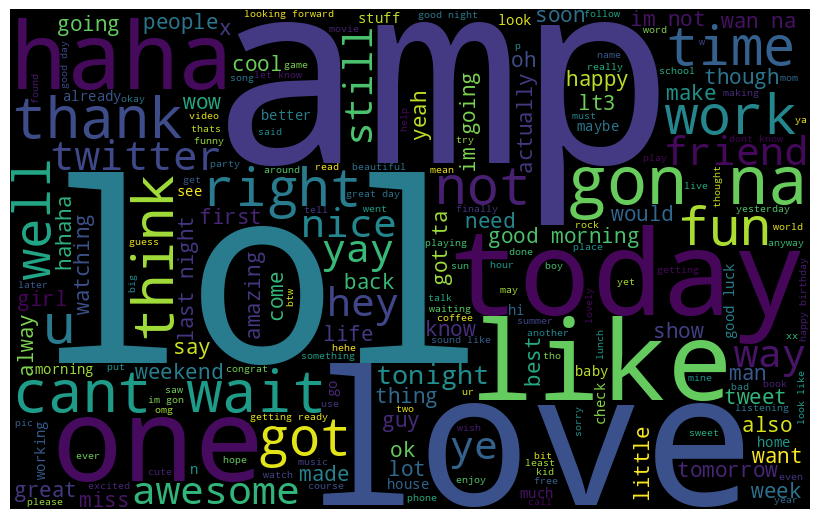

In [ ]:
from wordcloud import WordCloud
words_list = df[df['label']==1]['cleaned_text'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

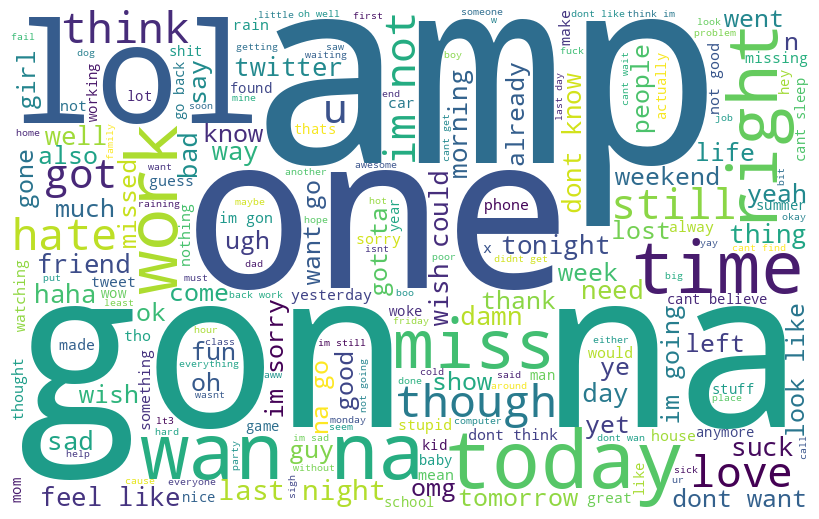

In [ ]:
from wordcloud import WordCloud
words_list = df[df['label']==0]['cleaned_text'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,background_color='white',
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
trained_df = df[['cleaned_text','label']]

In [ ]:
trained_df.sample(5)

,cleaned_text,label
265376,back work lay in,0
1442559,sample hacker email fr friend name subject quo...,1
897142,go drive,1
232389,sorry hear totally controllable im sick people...,0
847540,welcome look forward stimulating discussion ba...,1


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test  = train_test_split(trained_df , test_size=0.1, random_state=7,shuffle=True)

print("Train data size ",df_train.shape[0])
print("Test data size ",df_test.shape[0])

Train data size  1440000
Test data size  160000


In [ ]:
df_train.to_csv('/content/drive/MyDrive/dataset/train.csv')

In [ ]:
df_test.to_csv('/content/drive/MyDrive/dataset/test.csv')